## Рубежный контроль №1. Методы машинного обучения

**Студент:** Седойкин Г.С., ИУ5-22М  
**Вариант:** 10  
**Задачи:** 10, 30, гистрограмма для произвольной колонки

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.impute import MissingIndicator
%matplotlib inline 
sns.set(style="ticks")

Работа будет выполняться на датасете "[COVID-19's Impact on Educational Stress](https://www.kaggle.com/bsoyka3/educational-stress-due-to-the-coronavirus-pandemic)".  
Загрузим его:

In [2]:
data_set = pd.read_csv("../data/edu_stress.csv", sep=",")
print("shape:", data_set.shape)

shape: (37, 15)


### Задача №10
Для набора данных проведите устранение пропусков для одного (произвольного) категориального признака с использованием метода заполнения наиболее распространенным значением.

Изучим наличие пропусков в колонках датасета:

In [3]:
for col in data_set.columns:
    print("\"{0}\" - {1}%".format(col, round(data_set[col].isnull().mean() * 100, 1)))

"Category" - 0.0%
"Country" - 0.0%
"State" - 24.3%
"Age" - 0.0%
"Gender" - 8.1%
"Before-Environment" - 0.0%
"Before-ClassworkStress" - 0.0%
"Before-HomeworkStress" - 0.0%
"Before-HomeworkHours" - 0.0%
"Now-Environment" - 0.0%
"Now-ClassworkStress" - 0.0%
"Now-HomeworkStress" - 0.0%
"Now-HomeworkHours" - 0.0%
"FamilyRelationships" - 0.0%
"FriendRelationships" - 0.0%


Заполним попущенные значения для колонки "State" используя `SimpleImputer` со стратегией `most_frequent`:

In [4]:
print("\"State\" before imputer:")
data_set["State"].to_frame().T

"State" before imputer:


,0,1,2,3,4,5,6,7,8,9,...,27,28,29,30,31,32,33,34,35,36
State,TX,MD,TX,GA,NaN,WV,MO,PA,IL,MN,...,NaN,NaN,GA,IN,NaN,NaN,PA,NaN,AZ,NY


In [5]:
state_data_original = data_set[["State"]]
imputer = SimpleImputer(strategy="most_frequent")
state_data_imputed = imputer.fit_transform(state_data_original)
data_set[["State"]] = state_data_imputed

print("Percentage of missing values in \"State\" after imputer = {0}%".format(round(data_set["State"].isnull().mean() * 100, 1)))
print("\"State\" after imputer:")
data_set["State"].to_frame().T

Percentage of missing values in "State" after imputer = 0.0%
"State" after imputer:


,0,1,2,3,4,5,6,7,8,9,...,27,28,29,30,31,32,33,34,35,36
State,TX,MD,TX,GA,TX,WV,MO,PA,IL,MN,...,TX,TX,GA,IN,TX,TX,PA,TX,AZ,NY


### Задача №30
Для набора данных проведите удаление повторяющихся признаков.

В имеющемся датасете отсутствуют повторяющиеся признаки, посему добавим новый признак "Now-WeekendStress", полностью дублирующий "Now-HomeworkStress".

In [6]:
data_set["Now-WeekendStress"] = data_set["Now-HomeworkStress"]
data_set.columns

Index(['Category', 'Country', 'State', 'Age', 'Gender', 'Before-Environment',
       'Before-ClassworkStress', 'Before-HomeworkStress',
       'Before-HomeworkHours', 'Now-Environment', 'Now-ClassworkStress',
       'Now-HomeworkStress', 'Now-HomeworkHours', 'FamilyRelationships',
       'FriendRelationships', 'Now-WeekendStress'],
      dtype='object')

Выполним удаление дублирующихся признаков:

In [7]:
data_set = data_set.T.drop_duplicates().T
data_set.columns

Index(['Category', 'Country', 'State', 'Age', 'Gender', 'Before-Environment',
       'Before-ClassworkStress', 'Before-HomeworkStress',
       'Before-HomeworkHours', 'Now-Environment', 'Now-ClassworkStress',
       'Now-HomeworkStress', 'Now-HomeworkHours', 'FamilyRelationships',
       'FriendRelationships'],
      dtype='object')

### Задание группы
Для студентов групп ИУ5-22М, ИУ5И-22М - для произвольной колонки данных построить гистограмму.

<AxesSubplot:title={'center':'Age'}>

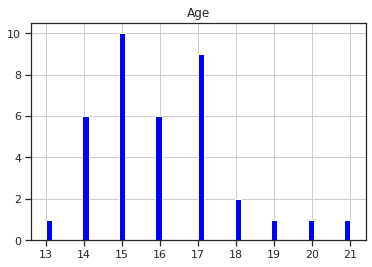

In [8]:
axes = plt.figure().add_subplot()
axes.title.set_text("Age")
data_set["Age"].hist(bins = 50, ax = axes, color = "blue")